# Import Necessary Libraries

In [54]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generating Data

In [55]:
X_train = np.linspace(-1, 1, 20)

In [56]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [57]:
X_test = np.linspace(-1, 1, 20)

In [58]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

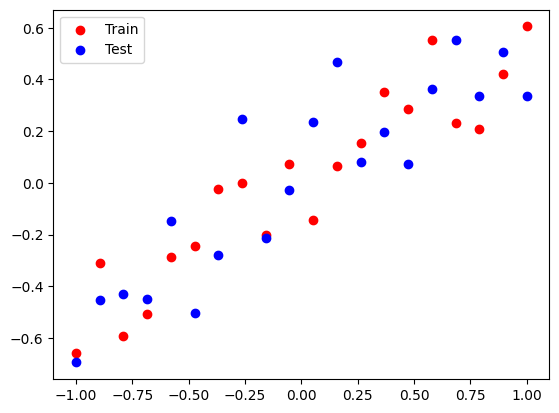

In [59]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model ANN

In [60]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=1))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics='mse')

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)

# Evaluate the Model

In [61]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004115309566259384, Test: 0.04541361331939697


In [62]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 92ms/step


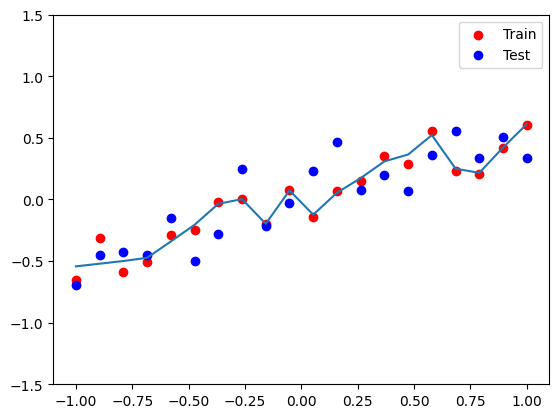

In [63]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

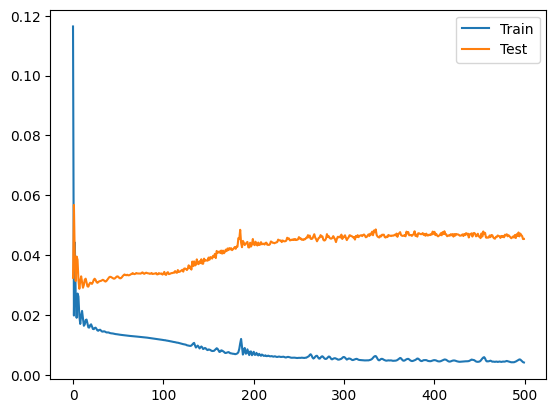

In [64]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

### This is the Before Dropout Model and Prediction Result

# Dropout Model

In [65]:
model_d = Sequential()

model_d.add(Dense(128, input_dim=1, activation="relu"))
# model_d.add(Dropout(0.5))
model_d.add(Dense(128, activation="relu"))
model_d.add(Dropout(0.5))
model_d.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)

model_d.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_d.fit(X_train, y_train, epochs=10, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [66]:
# evaluate the model
_, train_mse = model_d.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_d.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.01779485121369362, Test: 0.02974744141101837


In [67]:
y_pred_d = model_d.predict(X_test)

1/1 [==============================] - 0s 79ms/step


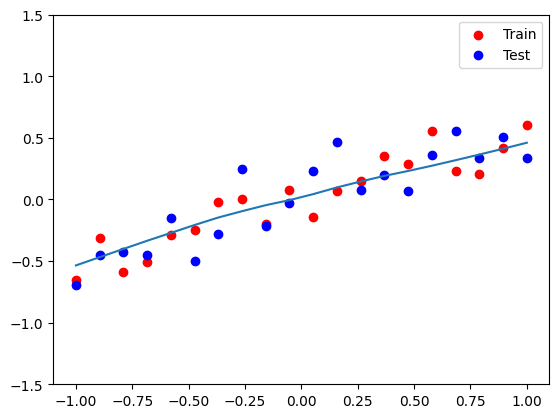

In [68]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_d)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

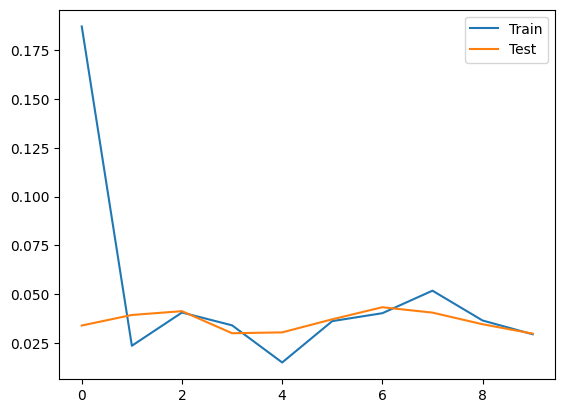

In [69]:
plt.plot(drop_out_history.history['loss'], label='Train')
plt.plot(drop_out_history.history['val_loss'], label='Test')
plt.legend()
plt.show()

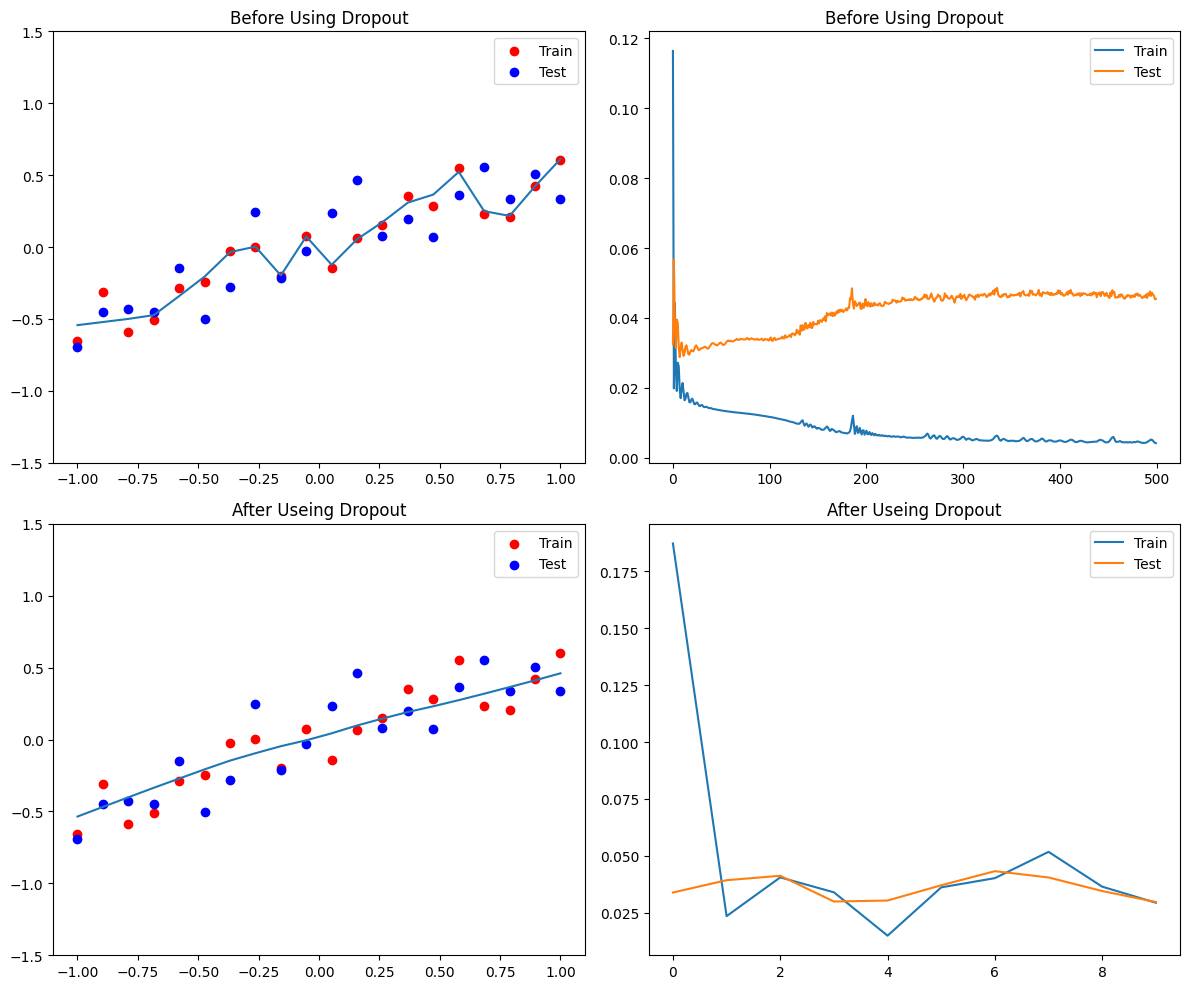

In [70]:
# Assuming you have variables:
# X_train, y_train, X_test, y_test, y_pred, y_pred_d, history, drop_out_history

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First subplot: Scatter and predicted line for the first model
axs[0, 0].set_title('Before Using Dropout')
axs[0, 0].scatter(X_train, y_train, c='red', label='Train')
axs[0, 0].scatter(X_test, y_test, c='blue', label='Test')
axs[0, 0].plot(X_test, y_pred)
axs[0, 0].set_ylim((-1.5, 1.5))
axs[0, 0].legend()

# Second subplot: Loss curves for the first model
axs[0, 1].set_title('Before Using Dropout')
axs[0, 1].plot(history.history['loss'], label='Train')
axs[0, 1].plot(history.history['val_loss'], label='Test')
axs[0, 1].legend()

# Third subplot: Scatter and predicted line for the second model
axs[1, 0].set_title('After Useing Dropout')
axs[1, 0].scatter(X_train, y_train, c='red', label='Train')
axs[1, 0].scatter(X_test, y_test, c='blue', label='Test')
axs[1, 0].plot(X_test, y_pred_d)
axs[1, 0].set_ylim((-1.5, 1.5))
axs[1, 0].legend()

# Fourth subplot: Loss curves for the second model
axs[1, 1].set_title('After Useing Dropout')
axs[1, 1].plot(drop_out_history.history['loss'], label='Train')
axs[1, 1].plot(drop_out_history.history['val_loss'], label='Test')
axs[1, 1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Now See the Result: 

In [ ]:
# Ses the difference before dropout and after dropout overfiting reduce 